In [74]:
import os
os.chdir('E:\\MY DATA\\P\\nv\\SOCIAL MEDIA SENTIMENT')

In [75]:
#import nltk
#nltk.dowload()

In [76]:
import pandas as pd

data=pd.read_csv('train_E6oV3lV.csv')
data.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [77]:
data.shape

(31962, 3)

In [78]:
data.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [79]:
data.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [81]:
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer

In [82]:
tk=TweetTokenizer()
ps = PorterStemmer()
lem=WordNetLemmatizer()
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_ðâï¼ªó¾ãº½çæåä¹³ìà¹ëêµéà³à²ùø]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    s=s.lower()
    s=tk.tokenize(s)
    s=[ps.stem(word) for word in s if not word in set(stopwords.words('english'))]
    s=[lem.lemmatize(word) for word in s]
    s= ' '.join(s)
    return s

In [83]:
data['content'] = [cleaning(s) for s in data['tweet']]
data['content']

0        user father dysfunct selfish drag kid dysfunct...
1        user user thank lyft credit use caus offer whe...
2                                           bihday majesti
3                              model love u take u time ur
4                                  factsguid societi motiv
5        huge fan fare big talk leav chao pay disput ge...
6        user camp tomorrow user user user user user us...
7        next school year year exam think school exam h...
8        love land allin cav champion cleveland clevela...
9                                        user user welm gr
10       ireland nsumer price index mom climb previou m...
11       selfish orlando standwithorlando pulseshoot or...
12                        get see daddi today day gettingf
13       user cnn call michigan middl school build wall...
14       mment australia opkillingbay seashepherd helpv...
15                ouch junior angri got junior yugyoem omg
16                                 thank paner thank pos

In [84]:
all_words = ' '.join([text for text in data['content']])
all_words

'user father dysfunct selfish drag kid dysfunct run user user thank lyft credit use caus offer wheelchair van pdx disapoint getthank bihday majesti model love u take u time ur factsguid societi motiv huge fan fare big talk leav chao pay disput get allshowandnogo user camp tomorrow user user user user user user user danni next school year year exam think school exam hate imagin actorslif revolutionschool girl love land allin cav champion cleveland clevelandcavali user user welm gr ireland nsumer price index mom climb previou may blog silver gold forex selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love get see daddi today day gettingf user cnn call michigan middl school build wall chant tt mment australia opkillingbay seashepherd helpvedolphin theve helpvedolphin ouch junior angri got junior yugyoem omg thank paner thank posit retweet agre friday smile around via ig user user oki make peopl know essenti oil made chemic euro peopl blame ha nc

In [85]:
#pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

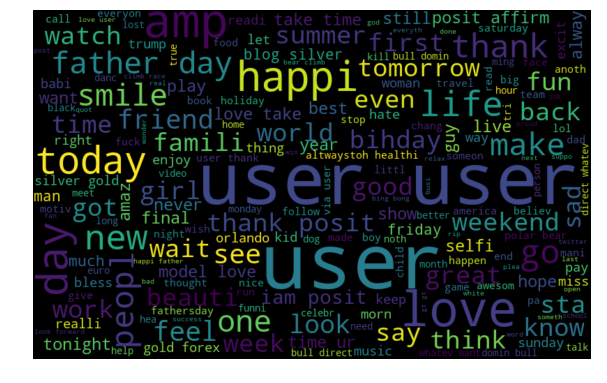

In [86]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [87]:
normal_words =' '.join([text for text in data['content'][data['label'] == 0]])
normal_words

'user father dysfunct selfish drag kid dysfunct run user user thank lyft credit use caus offer wheelchair van pdx disapoint getthank bihday majesti model love u take u time ur factsguid societi motiv huge fan fare big talk leav chao pay disput get allshowandnogo user camp tomorrow user user user user user user user danni next school year year exam think school exam hate imagin actorslif revolutionschool girl love land allin cav champion cleveland clevelandcavali user user welm gr ireland nsumer price index mom climb previou may blog silver gold forex selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love get see daddi today day gettingf ouch junior angri got junior yugyoem omg thank paner thank posit friday smile around via ig user user oki make peopl know essenti oil made chemic euro peopl blame ha ncede goal fat rooney gave away free kick know bale hit sad littl dude badday neofsham cat piss funni laugh product day happi man wine tool weeken

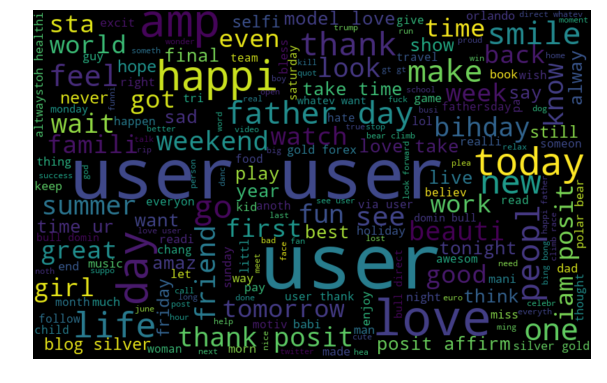

In [88]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [89]:
negative_words = ' '.join([text for text in data['content'][data['label'] == 1]])
negative_words

'user cnn call michigan middl school build wall chant tt mment australia opkillingbay seashepherd helpvedolphin theve helpvedolphin retweet agre user user lumpi say prove lumpi unbeliev st centuri need someth like neverump xenophobia user let fight love peac white establish blk folx run around love promot great user hey white peopl call peopl white user race ident med altright use amp insecur lure men whitesupremaci user interest linguist address race amp racism power raciolinguist bring user user mock obama black user user user user brexit peopl protest trump republican trump fuher amp ye call michelleobama gorilla racist long thought black peopl bet smaller hand show barri probabl lie knick game suck golf user user point one finger user million point right back jewishsupremacist might libtard libtard sjw liber polit user take trash america vote hate vote vote vot hold open door woman woman nice thing even tri deni user man ran governor ny state biggest african american popul stereoty

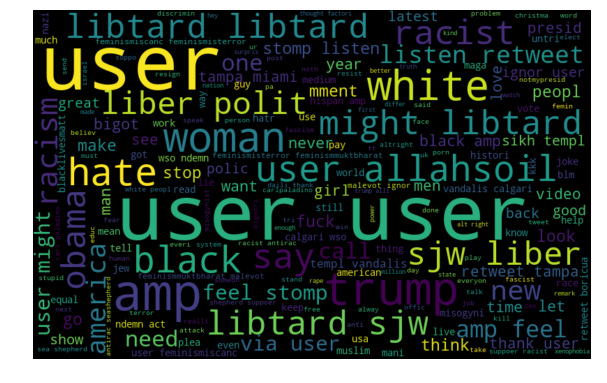

In [90]:
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [91]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht =re.findall(r'\w+', i)
        hashtags.append(ht)
    return hashtags

In [92]:
HT_regular = hashtag_extract(data['content'][data['label'] == 0])
HT_regular

[['user', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'dysfunct', 'run'],
 ['user',
  'user',
  'thank',
  'lyft',
  'credit',
  'use',
  'caus',
  'offer',
  'wheelchair',
  'van',
  'pdx',
  'disapoint',
  'getthank'],
 ['bihday', 'majesti'],
 ['model', 'love', 'u', 'take', 'u', 'time', 'ur'],
 ['factsguid', 'societi', 'motiv'],
 ['huge',
  'fan',
  'fare',
  'big',
  'talk',
  'leav',
  'chao',
  'pay',
  'disput',
  'get',
  'allshowandnogo'],
 ['user',
  'camp',
  'tomorrow',
  'user',
  'user',
  'user',
  'user',
  'user',
  'user',
  'user',
  'danni'],
 ['next',
  'school',
  'year',
  'year',
  'exam',
  'think',
  'school',
  'exam',
  'hate',
  'imagin',
  'actorslif',
  'revolutionschool',
  'girl'],
 ['love', 'land', 'allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['user', 'user', 'welm', 'gr'],
 ['ireland',
  'nsumer',
  'price',
  'index',
  'mom',
  'climb',
  'previou',
  'may',
  'blog',
  'silver',
  'gold',
  'forex'],
 ['selfish',
  'orlando',
  

In [93]:
HT_negative = hashtag_extract(data['content'][data['label'] == 1])
HT_negative

[['user',
  'cnn',
  'call',
  'michigan',
  'middl',
  'school',
  'build',
  'wall',
  'chant',
  'tt'],
 ['mment',
  'australia',
  'opkillingbay',
  'seashepherd',
  'helpvedolphin',
  'theve',
  'helpvedolphin'],
 ['retweet', 'agre'],
 ['user', 'user', 'lumpi', 'say', 'prove', 'lumpi'],
 ['unbeliev',
  'st',
  'centuri',
  'need',
  'someth',
  'like',
  'neverump',
  'xenophobia'],
 ['user', 'let', 'fight', 'love', 'peac'],
 ['white',
  'establish',
  'blk',
  'folx',
  'run',
  'around',
  'love',
  'promot',
  'great'],
 ['user',
  'hey',
  'white',
  'peopl',
  'call',
  'peopl',
  'white',
  'user',
  'race',
  'ident',
  'med'],
 ['altright', 'use', 'amp', 'insecur', 'lure', 'men', 'whitesupremaci'],
 ['user',
  'interest',
  'linguist',
  'address',
  'race',
  'amp',
  'racism',
  'power',
  'raciolinguist',
  'bring'],
 ['user',
  'user',
  'mock',
  'obama',
  'black',
  'user',
  'user',
  'user',
  'user',
  'brexit'],
 ['peopl', 'protest', 'trump', 'republican', 'trum

In [96]:
HT_regular = sum(HT_regular,[])
HT_regular

TypeError: can only concatenate list (not "str") to list

In [97]:
HT_negative = sum(HT_negative,[])
HT_negative

['user',
 'cnn',
 'call',
 'michigan',
 'middl',
 'school',
 'build',
 'wall',
 'chant',
 'tt',
 'mment',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpvedolphin',
 'theve',
 'helpvedolphin',
 'retweet',
 'agre',
 'user',
 'user',
 'lumpi',
 'say',
 'prove',
 'lumpi',
 'unbeliev',
 'st',
 'centuri',
 'need',
 'someth',
 'like',
 'neverump',
 'xenophobia',
 'user',
 'let',
 'fight',
 'love',
 'peac',
 'white',
 'establish',
 'blk',
 'folx',
 'run',
 'around',
 'love',
 'promot',
 'great',
 'user',
 'hey',
 'white',
 'peopl',
 'call',
 'peopl',
 'white',
 'user',
 'race',
 'ident',
 'med',
 'altright',
 'use',
 'amp',
 'insecur',
 'lure',
 'men',
 'whitesupremaci',
 'user',
 'interest',
 'linguist',
 'address',
 'race',
 'amp',
 'racism',
 'power',
 'raciolinguist',
 'bring',
 'user',
 'user',
 'mock',
 'obama',
 'black',
 'user',
 'user',
 'user',
 'user',
 'brexit',
 'peopl',
 'protest',
 'trump',
 'republican',
 'trump',
 'fuher',
 'amp',
 'ye',
 'call',
 'michelleobama',
 'gor

In [98]:
import seaborn as sns

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})

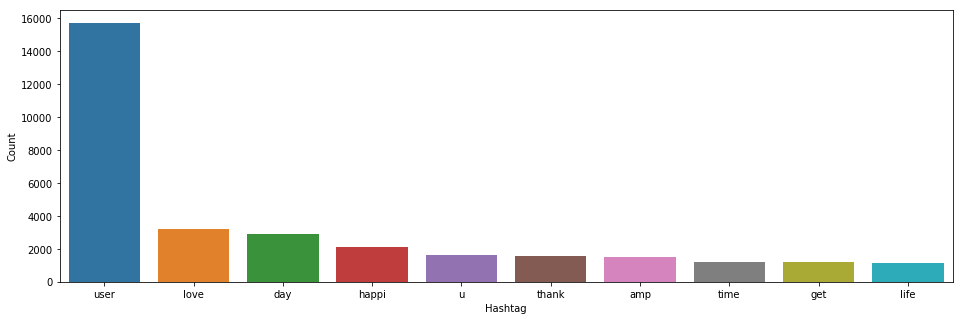

In [99]:
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [100]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

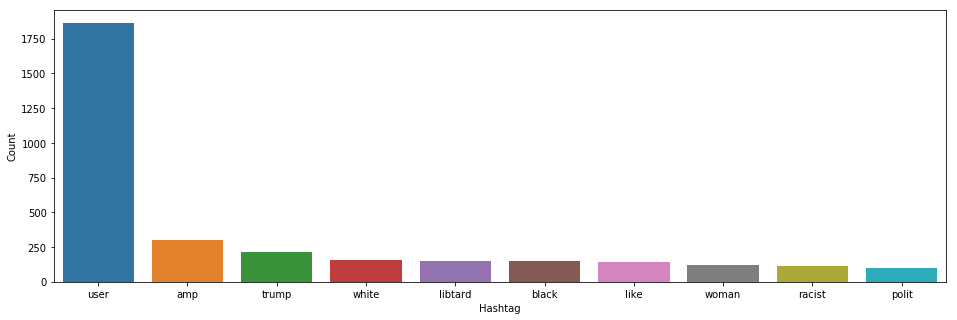

In [101]:
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [102]:
from sklearn.feature_extraction.text import  CountVectorizer

In [103]:
vectorizer = CountVectorizer(max_features=3000,stop_words=stopwords.words('english')).fit(data['content'])
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=3000, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs',... 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [104]:
X=vectorizer.transform(data['content']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [105]:
from sklearn.feature_extraction.text import TfidfTransformer

In [106]:
tran=TfidfTransformer().fit(X)

X=tran.transform(X).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
train_x,test_x,train_y,text_y=train_test_split(X,data.label.values,test_size=0.25,random_state=0)

In [109]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()

In [110]:
log_reg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [111]:
log_reg.score(train_x,train_y)

0.9559884860873555

In [112]:
log_reg.score(test_x,text_y)

0.9531973470153923

In [113]:
log_reg.score(X,data.label.values)

0.9552906576559664

In [114]:
from sklearn.model_selection import cross_val_score,KFold

kfold=KFold(n_splits=10)

In [115]:
score=cross_val_score(log_reg,X,data.label.values,cv=kfold,scoring="accuracy")
score

array([0.95276822, 0.95026587, 0.95244055, 0.95650814, 0.95463079,
       0.95650814, 0.94649562, 0.94899875, 0.95306633, 0.94993742])

In [116]:
score.mean()

0.9521619826628767

In [117]:
y_pred = log_reg.predict(test_x)
y_pred#predicted values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [118]:
text_y#actual values

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

In [120]:
cm_df = pd.DataFrame(confusion_matrix(text_y, y_pred).T, index=log_reg.classes_,columns=log_reg.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True          0    1
Predicted           
0          7431  345
1            29  186


In [121]:
print(classification_report(text_y, y_pred))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98      7460
          1       0.87      0.35      0.50       531

avg / total       0.95      0.95      0.94      7991



ROC AUC: 0.67


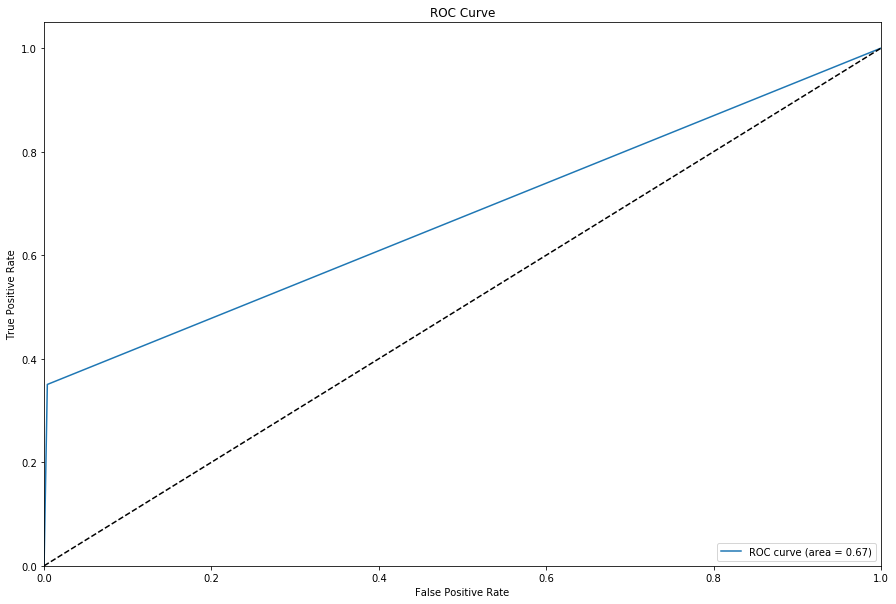

In [122]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, cohen_kappa_score

fpr, tpr, _ = roc_curve(text_y, y_pred)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
# Plot of a ROC curve for a specific class
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# NAIVE BAYES CLASSIFIER

In [50]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_x,train_y)

GaussianNB(priors=None)

In [51]:
model.score(train_x,train_y)

0.7071044178382212

In [52]:
model.score(test_x,text_y)

0.6952821924665249

In [53]:
model.score(X,data.label.values)

0.7041486765534072

In [54]:
score=cross_val_score(model,X,data.label.values,cv=kfold,scoring="accuracy")
score

array([0.65624023, 0.64935877, 0.65018773, 0.64768461, 0.65331665,
       0.65519399, 0.66020025, 0.66113892, 0.65018773, 0.64236546])

In [55]:
score.mean()

0.6525874343241845

In [56]:
y_predict = model.predict(test_x)
y_predict

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [58]:
cm_df = pd.DataFrame(confusion_matrix(text_y, y_predict).T, index=model.classes_,columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True          0    1
Predicted           
0          5145  120
1          2315  411


In [60]:
print(classification_report(text_y, y_predict))

             precision    recall  f1-score   support

          0       0.98      0.69      0.81      7460
          1       0.15      0.77      0.25       531

avg / total       0.92      0.70      0.77      7991



ROC AUC: 0.73


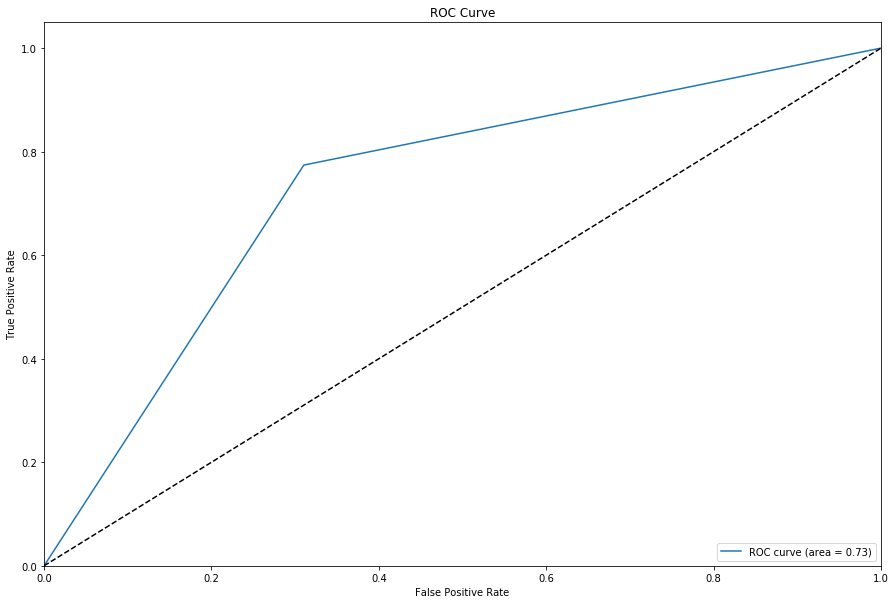

In [62]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, cohen_kappa_score
fpr, tpr, _ = roc_curve(text_y, y_predict)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
# Plot of a ROC curve for a specific class
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [63]:
"""
import xgboost
xgb=xgboost.XGBClassifier()
xgb.fit(train_x,train_y)
xgb.score(train_x,train_y)
xgb.score(test_x,text_y)
xgb.score(X,data.label.values)

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=100)
RF.fit(train_x,train_y)
RF.score(train_x,train_y)
RF.score(test_x,text_y)
RF.score(X,data.label.values)
"""

'\nimport xgboost\nxgb=xgboost.XGBClassifier()\nxgb.fit(train_x,train_y)\nxgb.score(train_x,train_y)\nxgb.score(test_x,text_y)\nxgb.score(X,data.label.values)\n\nfrom sklearn.ensemble import RandomForestClassifier\nRF=RandomForestClassifier(n_estimators=100)\nRF.fit(train_x,train_y)\nRF.score(train_x,train_y)\nRF.score(test_x,text_y)\nRF.score(X,data.label.values)\n'

In [64]:
#################################TEST DATA PREDICTION########################### 

In [124]:
data_test=pd.read_csv('test_tweets_anuFYb8.csv')
data_test.head()

id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...

In [125]:
data_test['content'] = [cleaning(s) for s in data_test['tweet']]
data_test['content']

0        studiolif aislif requir passion dedic willpow ...
1        user white supremacist want everyon see new bi...
2                safe way heal acn altwaystoh healthi heal
3        hp cur child book reserv alreadi ye harrypott ...
4        rd bihday amaz hilari nephew eli ahmir uncl da...
5                                             choos momtip
6        someth insid die eye ness smokeyey tire lone s...
7                 finish tattoo ink ink loveit thank aleee
8        user user user never understand dad left young...
9          delici food lovelif capetown mannaepicur restur
10       dayswast narsi infinit ep make awar grind neur...
11             one world greatest spo event leman teamaudi
12                             half way websit allgoingwel
13       good food good life enjoy call garlic bread il...
14       stand behind gunntrolpleas senselessshoot take...
15       ate ate ate jamaisasthi fish curri prawn hilsa...
16       user got user limit edit rain shine set today .

In [126]:
X_test=vectorizer.transform(data_test['content']).toarray()

X_test=tran.fit_transform(X_test).toarray()

In [129]:
data_test['Predict_label']=log_reg.predict(X_test)
data_test['Predict_label']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       1
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
17167    0
17168    0
17169    0
17170    0
17171    0
17172    0
17173    0
17174    0
17175    0
17176    1
17177    0
17178    0
17179    0
17180    0
17181    0
17182    0
17183    0
17184    0
17185    0
17186    0
17187    0
17188    1
17189    0
17190    0
17191    0
17192    1
17193    0
17194    0
17195    0
17196    0
Name: Predict_label, Length: 17197, dtype: int64

In [132]:
data_test.columns

Index(['id', 'content', 'Predict', 'Predict_label'], dtype='object')

In [131]:
data_test.drop(['tweet'],axis=1,inplace=True)

In [73]:
data_test.to_csv('SampleSubmission.csv',index = False)